<a href="https://colab.research.google.com/github/ogut77/LogisticRegression/blob/master/Santander3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
   

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!pip install kaggle

In [0]:
!mkdir '/content/.kaggle/'

In [27]:
!ls '/content/santander/'

sample_submission.csv.zip  test.csv.zip  train.csv.zip


In [0]:
import json
token = {"username":"hulisi","key":"4163066d5cebf9ad2cc14e4ef9a71c3c"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp '/content/.kaggle/kaggle.json' ~/.kaggle/kaggle.json

In [20]:
!kaggle config set -n path -v{/content/}

- path is now set to: {/content/}


In [33]:
!kaggle competitions download -c santander-customer-transaction-prediction -p /content/

 99% 121M/122M [00:02<00:00, 28.7MB/s]
100% 122M/122M [00:02<00:00, 44.6MB/s]
  0% 0.00/463k [00:00<?, ?B/s]
100% 463k/463k [00:00<00:00, 106MB/s]
 98% 119M/122M [00:00<00:00, 144MB/s]
100% 122M/122M [00:00<00:00, 141MB/s]


In [34]:
!ls '/content/'

drive	     sample_submission.csv.zip	test.csv.zip
sample_data  santander			train.csv.zip


In [132]:
d2 = pd.read_csv('/content/drive/My Drive/Santander/train.csv')
d2.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
d2.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [0]:
d2.drop(['ID_code'], axis = 1, inplace = True)

In [135]:
d2.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
dx=d2.iloc[:,1:]

In [0]:
dy=d2.iloc[:,0:1]

In [138]:
dx = pd.DataFrame(dx)
dx.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
dx = sc.fit_transform(dx) 

In [144]:
dx = pd.DataFrame(dx)
dx.shape
dx.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-0.529144,-1.321758,0.331936,0.076037,0.486149,0.986322,0.604114,-0.113983,0.300075,0.068793,...,0.083548,-1.600708,0.111059,-1.042115,0.194579,-1.750237,-0.228065,-0.362497,0.546830,-0.981711
1,2.314702,-0.094768,0.597315,1.263057,0.106570,-1.259286,-1.378099,0.131403,-1.170218,-0.672782,...,1.181679,-0.612212,-0.845026,-0.567252,0.009273,-1.354643,1.360647,-0.131858,0.100923,-0.259530
2,0.047399,-1.543014,0.533194,-0.327538,-0.173090,0.350186,0.801021,-0.058825,-1.404957,2.290167,...,-0.038384,0.686378,0.391925,-0.009180,0.058755,-0.208516,-0.699995,1.719948,0.691847,-0.307908
3,1.189880,0.602456,-0.771092,1.488016,-0.410913,0.092598,0.494689,0.101114,-1.005328,0.713937,...,1.622116,1.794875,0.705301,0.494924,0.268217,-0.841420,1.050389,-0.135779,0.336008,-1.680223
4,0.554619,0.183962,-1.264786,-0.230476,-0.053585,-1.156959,-0.019276,-1.028456,1.599331,-0.005554,...,1.086851,-1.445677,0.382634,-0.184068,-1.206265,0.626516,-0.246147,-0.738633,0.287940,2.448163


In [145]:
dx.describe()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,...,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,3.264278e-17,-5.508927e-17,1.326324e-17,-2.429723e-17,-8.046896e-18,-7.552292e-18,-3.663458e-17,-3.237743e-17,-1.852185e-17,-4.054534e-17,...,1.392775e-17,2.286782e-17,-5.823120e-18,3.290118e-17,2.576554e-17,5.896894e-17,5.128439e-17,1.405709e-17,4.406031e-17,2.398137e-17
std,1.101493e+00,1.027496e+00,1.026879e+00,1.026419e+00,1.026193e+00,1.025398e+00,1.024444e+00,1.023834e+00,1.023558e+00,1.023296e+00,...,9.825309e-01,9.822446e-01,9.818502e-01,9.813593e-01,9.806733e-01,9.805768e-01,9.804181e-01,9.800299e-01,9.798573e-01,9.792997e-01
min,-4.683073e+00,-4.370615e+00,-4.398201e+00,-4.500944e+00,-4.335169e+00,-4.252212e+00,-4.467492e+00,-4.442514e+00,-4.683042e+00,-4.215258e+00,...,-4.103992e+00,-4.187268e+00,-4.702061e+00,-4.591094e+00,-4.190143e+00,-4.239434e+00,-4.226821e+00,-4.270482e+00,-4.365201e+00,-4.547678e+00
25%,-7.489999e-01,-6.937100e-01,-6.939401e-01,-6.920381e-01,-6.940512e-01,-6.914661e-01,-6.906722e-01,-6.924129e-01,-6.902483e-01,-6.922952e-01,...,-6.639196e-01,-6.618830e-01,-6.613212e-01,-6.633255e-01,-6.618081e-01,-6.618037e-01,-6.624127e-01,-6.621547e-01,-6.618566e-01,-6.584941e-01
50%,-3.936950e-02,-3.969168e-04,1.755160e-03,-3.024970e-04,2.032858e-03,-2.909175e-03,-8.183166e-04,3.971031e-04,2.125918e-03,1.748285e-03,...,3.014346e-04,-3.052135e-03,-2.647545e-03,-1.746989e-03,-3.303214e-03,-4.235263e-04,-2.902051e-03,-1.491405e-03,1.722111e-03,1.776928e-03
75%,7.020343e-01,6.930307e-01,6.938623e-01,6.933638e-01,6.906039e-01,6.925068e-01,6.897978e-01,6.893202e-01,6.895185e-01,6.910309e-01,...,6.623036e-01,6.634971e-01,6.605371e-01,6.634623e-01,6.615050e-01,6.624758e-01,6.629554e-01,6.597647e-01,6.631402e-01,6.629438e-01
max,5.938376e+00,4.819486e+00,4.488833e+00,4.585744e+00,6.166446e+00,4.567724e+00,4.488799e+00,4.873452e+00,4.729443e+00,4.937578e+00,...,5.431009e+00,4.871860e+00,4.717397e+00,4.990465e+00,4.251100e+00,4.410511e+00,4.289014e+00,4.271594e+00,5.168137e+00,4.966518e+00


In [0]:
#merge dx with dy if scale 

dt=pd.concat([dy, dx], axis=1)


In [147]:
dt.head(2)

,target,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
0,0,-0.529144,-1.321758,0.331936,0.076037,0.486149,0.986322,0.604114,-0.113983,0.300075,...,0.083548,-1.600708,0.111059,-1.042115,0.194579,-1.750237,-0.228065,-0.362497,0.546830,-0.981711
1,0,2.314702,-0.094768,0.597315,1.263057,0.106570,-1.259286,-1.378099,0.131403,-1.170218,...,1.181679,-0.612212,-0.845026,-0.567252,0.009273,-1.354643,1.360647,-0.131858,0.100923,-0.259530


In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dt, test_size=0.2)

In [149]:
train.describe()

,target,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,0.100388,0.002492,0.000215,0.000915,0.001937,0.000719,0.001928,0.002439,-0.000157,0.001634,...,-0.000814,-0.000191,-0.000834,-0.000099,-0.000090,-0.000208,-0.001015,0.000917,0.000576,-0.000832
std,0.300517,1.098849,1.027368,1.025951,1.027237,1.027026,1.025883,1.024131,1.023585,1.023739,...,0.982454,0.983224,0.982086,0.981465,0.980780,0.981010,0.981055,0.979325,0.980505,0.979388
min,0.000000,-4.343509,-4.370615,-4.358870,-4.500944,-4.335169,-4.083969,-4.369663,-4.442514,-4.683042,...,-4.103992,-4.187268,-4.702061,-4.181393,-4.190143,-4.239434,-4.226821,-4.270482,-4.365201,-4.547678
25%,0.000000,-0.747033,-0.694194,-0.690232,-0.689406,-0.694120,-0.688119,-0.686038,-0.693471,-0.688825,...,-0.665525,-0.663582,-0.662257,-0.663117,-0.661910,-0.661606,-0.662722,-0.660989,-0.661804,-0.658554
50%,0.000000,-0.036403,-0.001356,0.002104,0.002335,0.003219,0.000171,0.001891,0.000155,0.003665,...,-0.000175,-0.004319,-0.003457,-0.001323,-0.003468,0.000082,-0.003104,-0.001591,0.002405,0.000486
75%,0.000000,0.704788,0.693595,0.694576,0.694821,0.691018,0.695197,0.693147,0.689741,0.691011,...,0.659255,0.665139,0.661263,0.663886,0.662483,0.661970,0.661004,0.659765,0.664705,0.661572
max,1.000000,5.707648,4.254368,4.488833,4.585744,6.166446,4.567724,4.488799,4.873452,4.729443,...,5.431009,4.871860,4.717397,4.990465,4.251100,4.410511,4.289014,4.271594,5.168137,4.966518


In [150]:
print(train.shape)
test.shape

(160000, 151)


(40000, 151)

In [128]:
train.head()

,target,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
39846,0,0.895911,-1.269637,1.595172,-1.122883,1.769802,-1.734320,-0.152944,-1.437989,-1.456765,...,2.017390,-0.661444,-0.140218,-0.920221,-1.191208,1.895771,-0.122796,-0.409913,1.258262,1.654723
92623,0,0.081698,0.874491,1.148380,0.612312,1.308467,-0.961393,1.829876,1.515396,1.408539,...,0.010329,1.865223,-0.063733,1.276376,-1.105407,-0.432226,0.767482,-2.316392,-1.432714,0.160592
21222,0,-0.824188,-0.799838,0.552824,2.025502,-0.581667,1.984731,-0.365197,0.091290,-0.106883,...,0.884960,1.244404,1.367107,0.473790,1.403777,-0.230374,1.187457,0.987276,-1.838769,-1.719960
179748,0,-0.493687,-0.263326,-1.276952,0.076836,0.349561,0.875967,-0.440738,-0.262466,-1.270441,...,-1.168887,-1.408755,-1.400412,-1.344836,-1.768302,0.714203,0.485513,1.186778,-0.528214,0.139086
150051,0,0.145983,-0.559017,1.621252,-1.564150,-0.435437,0.862154,1.107377,0.110321,-0.349958,...,-0.390180,-0.156766,0.322884,-0.334683,-0.379085,-0.639884,0.097211,0.978555,-0.600003,0.645232


In [0]:
X_train=train.iloc[:,1:]
X_test=test.iloc[:,1:]
y_train=train.iloc[:,0:1]
y_test=test.iloc[:,0:1]

In [152]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,-0.009969,-0.000861,-0.003661,-0.007749,-0.002877,-0.007710,-0.009757,0.000628,-0.006537,-0.003391,...,0.003258,0.000764,0.003336,0.000396,0.000359,0.000831,0.004061,-0.003667,-0.002305,0.003330
std,1.111967,1.028025,1.030586,1.023116,1.022865,1.023433,1.025653,1.024842,1.022819,1.024262,...,0.982844,0.978328,0.980911,0.980949,0.980259,0.978852,0.977869,0.982850,0.977271,0.978953
min,-4.683073,-4.085822,-4.398201,-4.227556,-4.171722,-4.252212,-4.467492,-4.323473,-4.375755,-4.035621,...,-3.837154,-4.022554,-4.210793,-4.591094,-4.109285,-3.798605,-3.923197,-4.015625,-4.160880,-3.855955
25%,-0.756994,-0.691476,-0.707846,-0.703444,-0.693633,-0.704269,-0.706656,-0.689891,-0.696226,-0.694412,...,-0.658364,-0.654687,-0.656663,-0.664909,-0.661228,-0.662664,-0.660405,-0.666342,-0.662049,-0.658112
50%,-0.053580,0.004223,0.000308,-0.012687,-0.002991,-0.015451,-0.011694,0.002122,-0.003435,-0.001606,...,0.002633,0.001498,-0.000798,-0.003280,-0.002778,-0.003044,-0.002424,-0.001132,-0.000940,0.006711
75%,0.691868,0.690616,0.691151,0.685165,0.687644,0.681655,0.674864,0.687978,0.682214,0.687811,...,0.673246,0.656682,0.657334,0.662245,0.658149,0.664583,0.671543,0.659681,0.656259,0.668834
max,5.938376,4.819486,4.084691,4.201175,4.774795,4.030600,4.107842,4.296896,4.702594,4.241332,...,3.494462,3.918164,3.728241,3.732705,3.883194,3.874704,4.048236,3.966050,3.931646,4.196551


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
RFC = RandomForestClassifier()  
             
RFC.fit(X_train, y_train)  
y_pred = RFC.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[[35945    48]
 [ 3947    60]]
Accuracy score is 0.900125


[[35822    54]
 [ 4050    74]]
Accuracy score is 0.8974


In [83]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35449   544]
 [ 2903  1104]]
Accuracy score is 0.913825


[[35367   509]
 [ 3020  1104]]
Accuracy score is 0.911775


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35867     9]
 [ 4058    66]]
Accuracy score is 0.898325


In [84]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35989     4]
 [ 3942    65]]
Accuracy score is 0.90135


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)  
lda.fit_transform(X_train, y_train)

y_pred = lda.predict(X_test) 
print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35334   542]
 [ 2986  1138]]
Accuracy score is 0.9118


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35333   504]
 [ 2997  1166]]
Accuracy score is 0.912475
0.633011399446922
0.633011399446922
0.8652957527534239


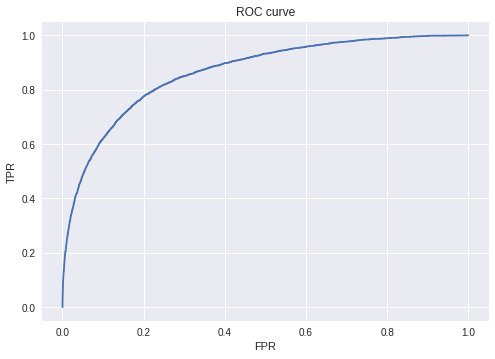

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
lda = LDA(n_components=2)  
lda.fit_transform(X_train, y_train)

y_pred = lda.predict(X_test) 
predictions = lda.predict_proba(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lda.predict(X_test))
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, lda.predict(X_test)))
predictions = lda.predict_proba(X_test)

print(roc_auc_score(y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


[[35333   504]
 [ 2997  1166]]
Accuracy score is 0.912475
0.633011399446922
0.633011399446922
0.8652957527534239

In [100]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = model.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35832     5]
 [ 4090    73]]
Accuracy score is 0.897625
0.5086979552861222
0.5086979552861222


[[35832     5]
 [ 4090    73]]
Accuracy score is 0.897625
0.5086979552861222
0.5086979552861222

In [109]:
import sklearn.linear_model as lm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
model = lm.LogisticRegression()

a=model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred = model.predict(X_test)
predictions = model.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35360   477]
 [ 3036  1127]]
Accuracy score is 0.912175
0.6287039830589609
0.6287039830589609


In [0]:
[[35360   477]
 [ 3036  1127]]
Accuracy score is 0.912175
0.6287039830589609
0.6287039830589609

[[35360   477]
 [ 3036  1127]]
Accuracy score is 0.912175
0.6287039830589609
0.6287039830589609

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

RFC = RandomForestClassifier()  
             
RFC.fit(X_train, y_train)  
y_pred = RFC.predict(X_test)



print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[35889    51]
 [ 3998    62]]
Accuracy score is 0.898775
0.5069259521205294
0.5069259521205294


In [0]:
def rf_feature_importance(m,df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [152]:
fi = rf_feature_importance(RFC, X_train); fi[:30]

,cols,imp
81,81,0.011674
139,139,0.009756
12,12,0.009626
80,80,0.008441
110,110,0.008403
109,109,0.008236
26,26,0.008102
53,53,0.008084
166,166,0.007941
174,174,0.007842


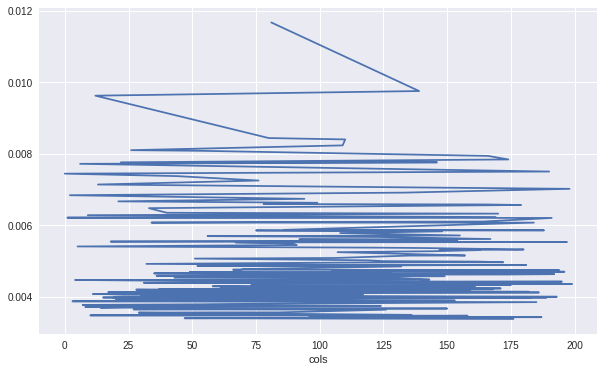

In [153]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [154]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

71

In [0]:
X_train2 = X_train[to_keep].copy()

In [0]:
X_test2 = X_test[to_keep].copy()

In [125]:
X_train.shape

(160000, 37)

In [157]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
lda = LDA(n_components=2)  
lda.fit_transform(X_train2, y_train)

y_pred = lda.predict(X_test2) 
predictions = lda.predict_proba(X_test2)
print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35540   400]
 [ 3261   799]]
Accuracy score is 0.908475
0.5928341845056485


ValueError: ignored

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

RFC = RandomForestClassifier()  
             
RFC.fit(X_train2, y_train)  
y_pred = RFC.predict(X_test2)



print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[35851    89]
 [ 3934   126]]
Accuracy score is 0.899425
0.5142790666436398
0.5142790666436398


In [0]:
def logistic_feature_importance(m,df):
    return pd.DataFrame({'cols':df.columns, 'imp':abs(m.coef_[0])}
                       ).sort_values('imp', ascending=False)

In [166]:
lfi=logistic_feature_importance(model,X_train); lfi[:30]

,cols,imp
81,81,0.255369
139,139,0.232759
6,6,0.228867
76,76,0.214066
12,12,0.213014
110,110,0.207541
21,21,0.204904
53,53,0.203433
146,146,0.200756
174,174,0.198823


In [168]:
to_keep = lfi[lfi.imp>0.1].cols; len(to_keep)

79

In [0]:
X_train2 = X_train[to_keep].copy()

In [0]:
X_test2 = X_test[to_keep].copy()

In [171]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
lda = LDA(n_components=2)  
lda.fit_transform(X_train2, y_train)

y_pred = lda.predict(X_test2) 
predictions = lda.predict_proba(X_test2)
print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35516   424]
 [ 3164   896]]
Accuracy score is 0.9103
0.6044461074971695
0.6044461074971695




```[[35516   424]
 [ 3164   896]]
Accuracy score is 0.9103
0.6044461074971695
0.6044461074971695
# This is formatted as code
```



In [111]:
print(X_test.shape)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
lda = LDA(n_components=2)  
lda.fit_transform(X_train, y_train)

y_pred = lda.predict(X_test) 
predictions = lda.predict_proba(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("Area under ROC is "+str(auc(false_positive_rate, true_positive_rate)))
print(roc_auc_score(y_test, y_pred))

(40000, 100)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35484   445]
 [ 3157   914]]
Accuracy score is 0.90995
Area under ROC is 0.6060646615343934
0.6060646615343934


[[35484   445]
 [ 3157   914]]
Accuracy score is 0.90995
Area under ROC is 0.6060646615343934 /X with PCA(100) scaled

[[35558   414]
 [ 3244   784]]
Accuracy score is 0.90855
Area under ROC is 0.5915642929163375 // LDA with PCA(150)

[[35870   203]
 [ 3588   339]]
Accuracy score is 0.905225
Area under ROC is 0.5403489808258896 //LDA X with PCA(100) no scaled

[[35448   516]
 [ 2914  1122]]
Accuracy score is 0.91425
Area under ROC is 0.6318251684125487 // X with scaling

[[35484   526]
 [ 2849  1141]]
Accuracy score is 0.915625
Area under ROC is 0.6356789293422392
0.6356789293422392 // LDA with no scaling full X (base)

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

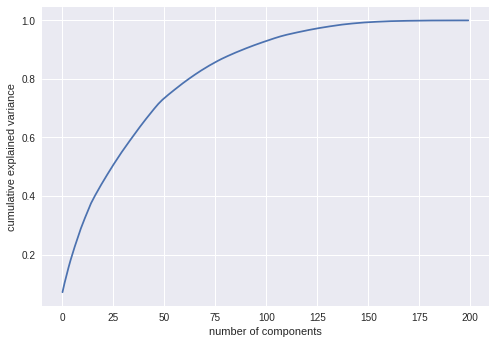

In [59]:
from sklearn.decomposition import PCA
pca = PCA().fit(dx)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [141]:
pca = PCA(n_components=150)
pca.fit(dx)
dx = pca.transform(dx)
dx.shape

(200000, 150)

In [0]:
def ldaf(X_train, y_train, X_test, y_test):
  print(X_test.shape)
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
  from sklearn.metrics import accuracy_score,confusion_matrix
  from sklearn.metrics import roc_curve, auc, roc_auc_score
  import matplotlib.pyplot as plt
  lda = LDA(n_components=2)  
  lda.fit_transform(X_train, y_train)

  y_pred = lda.predict(X_test) 
  predictions = lda.predict_proba(X_test)
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy score is "+str(accuracy_score(y_test,y_pred)))
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  print("Area under ROC is "+str(auc(false_positive_rate, true_positive_rate)))
  return auc(false_positive_rate, true_positive_rate)

In [153]:
ldaf(X_train, y_train, X_test, y_test)

(40000, 150)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35423   541]
 [ 2945  1091]]
Accuracy score is 0.91285
Area under ROC is 0.6276371625452123


0.6276371625452123

In [0]:
#run k-means where k=3
from sklearn.cluster import KMeans
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(dx)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_